In [1]:
from pathlib import Path
from nudging.dataset import Milkman, Hotard
import warnings
import numpy as np
from nudging.model import BiRegressor
from nudging.model import ProbModel, MDMModel, PCAModel
from sklearn.linear_model import ARDRegression, LogisticRegression
from nudging.partition import KSplitPartitioner, compute_partition_correlation, KMeansPartitioner, RandomPartitioner

In [2]:
warnings.filterwarnings("ignore")

In [5]:
models = {
    "mdm": MDMModel(ARDRegression()),
    "prob_log": ProbModel(LogisticRegression()),
    "prob_bay": ProbModel(ARDRegression()),
    "t-learner": BiRegressor(ARDRegression()),
    "pca": PCAModel(ARDRegression()),
}


In [4]:
n_repeat = 10
results = {name: [] for name in models}

for intervention in Milkman.available_interventions:
    dataset = Milkman.from_file(Path("data", "pptdata.csv"), intervention=intervention)
    print(f"------ {intervention} ------")
    for model_name, model in models.items():
        cur_correlation = [compute_partition_correlation(model, dataset, KSplitPartitioner, KMeansPartitioner)["all"]
                           for _ in range(n_repeat)]
        results[model_name].append(np.mean(cur_correlation))


KeyboardInterrupt: 

TypeError: 'NoneType' object is not iterable

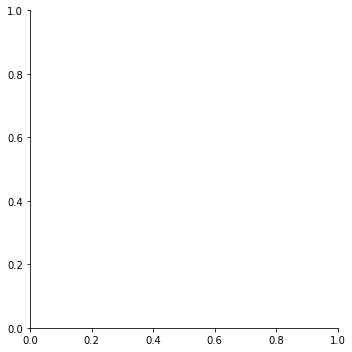

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.displot(results, kind="kde")
plt.show()

In [ ]:
from nudging.simulation import generate_datasets

In [ ]:
datasets = generate_datasets(100, control_precision=1, control_unique=0)

In [ ]:
sim_zero_results = {n: [] for n in models}
for dataset in datasets:
    for model_name, model in models.items():
        cur_correlation = [compute_partition_correlation(model, dataset, KSplitPartitioner, KMeansPartitioner)["all"]
                           for _ in range(n_repeat)]
        sim_zero_results[model_name].append(np.mean(cur_correlation))

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.displot(sim_zero_results, kind="kde")
plt.show()

In [7]:
from nudging.dataset import Pennycook1, Pennycook2, Balaban, Hotard, Lieberoth, Vandenbroele

all_data = {
    "penny1": Pennycook1.from_file("data"),
    "penny2": Pennycook2.from_file("data"),
    "balaban": Balaban.from_file("data"),
    "hotard": Hotard.from_file("data"),
    "lieberoth": Lieberoth.from_file("data"),
    "broele": Vandenbroele.from_file("data"),
}

In [14]:
for dataset_name, dataset in all_data.items():
    print(f"------ {dataset_name} ------")
    for model_name, model in models.items():
        print(model_name, np.mean([
            compute_partition_correlation(model, dataset, KSplitPartitioner, KMeansPartitioner)["all"]
            for _ in range(n_repeat)]))

------ penny1 ------
mdm 0.19734590870070917
prob_log 0.27566307708642024
prob_bay 0.015273502491405347
t-learner 0.28210265471502977
pca 0.03133088361412636
------ penny2 ------
mdm -0.09268194021427109
prob_log 0.056651552225622834
prob_bay 0.07238231982027117
t-learner -0.08295043864964466
pca 0.012170316803407867
------ balaban ------
mdm -0.15019872502424855
prob_log -0.13289589022278955
prob_bay -0.25201142203181615
t-learner -0.28372540940474855
pca -0.2242532329744479
------ hotard ------
mdm -0.19379746631962586
prob_log -0.16992701471031965
prob_bay -0.08557719117297637
t-learner -0.2923412739937734
pca -0.1585912410798053
------ lieberoth ------
mdm -0.23450742622398887
prob_log -0.231951082921637
prob_bay -0.19924152992114924
t-learner -0.3163782147172458
pca -0.38450047156030936
------ broele ------
mdm -0.11069883974098556
prob_log -0.00952403625711063
prob_bay -0.248362650261419
t-learner -0.38408361436128785
pca 0.030396713068256465
